**PANDAS** es una herramienta de análisis y manipulación de datos de código abierto rápida, potente, flexible y fácil de usar, construido sobre el lenguaje de programación Python.

# INSTALACIÓN

**Anaconda**

pandas es parte de la distribución de Anaconda y puede ser instalado usando:
```bash
conda install pandas
```
**PIP**

pandas puede ser instalado via pip desde [PyPI](https://pypi.org/project/pandas/)
```bash
pip install pandas
```

La obtener información sobre todo lo que puede hacerse con pandas se puede buscar en la [documentación](https://pandas.pydata.org/docs).

¿Qué tipo de datos maneja?

pandas trabaja con datos tabulados, como datos almacenados en hojas de cálculo o bases de datos. pandas ayuda a explorar, limpiar y procesar datos. En pandas, una tabla de datos se llama DataFrame.

In [1]:
# Para usar la bilbioteca debemos comenzar el script importándola
import pandas as pd

In [2]:
# Crear dataframe a partir de diccionario

diccionario = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=diccionario)
print(df)

   col1  col2
0     1     3
1     2     4


In [3]:
# Crear dataframe a partir de numpy array

import numpy as np

array_1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
df2 = pd.DataFrame(array_1,columns=['a', 'b', 'c'])
print(df2)

   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


#### ¿Cómo leo y escribo datos tabulares?

pandas admite la integración con muchos formatos de archivo o fuentes de datos listos para usar (csv, excel, sql, json, parquet,...).
La función con el prefijo read_* proporciona la importación de datos de cada una de estas fuentes de datos. De manera similar, los métodos to_* se utilizan para almacenar datos.

📝 **Consigna 1:** Les propongo cargar una tabla propia a partir de un archivo ¿cómo harían para visualizar las primeras 3 filas de su tabla? 

In [16]:
path = '/home/lean/Documentos/Lean/Estadistica/tabla de corales.1.xlsm'
datos_pdb = pd.read_excel(path)

datos_pdb.head()
# datos_pdb.tail()
# datos_pdb.columns
len(datos_pdb[datos_pdb['Especie']=='Balanophyllia malouinensis'])

43

In [4]:
datos_pdb.columns

Index(['id', 'edad', 'pregunta_edad', 'pregunta_imc',
       'pregunta_circunferencia_de_cintura', 'pregunta_actividad_fisica',
       'pregunta_consume_vegetales_frutas_y_hortalizas',
       'pregunta_toma_medicacion_para_controlar_hta',
       'pregunta_le_encontraron_hiperglucemia',
       'pregunta_le_diagnosticaron_diabetes_a_algun_familiar', 'puntaje',
       'puntaje_rev', 'control_o_intervencion', 'numero_doc', 'nombre',
       'apellido', 'sexo', 'fecha_de_nacimiento', 'domicilio', 'telefono',
       'celular', 'email', 'user_id', 'created_at', 'updated_at'],
      dtype='object')

In [5]:
datos_pdb.loc[5:10,['PDB ID','Chain ID','Structure Title']]

,PDB ID,Chain ID,Structure Title
5,1A0S,P,SUCROSE-SPECIFIC PORIN
6,1A0S,Q,SUCROSE-SPECIFIC PORIN
7,1A0S,R,SUCROSE-SPECIFIC PORIN
8,1A0T,P,"SUCROSE-SPECIFIC PORIN, WITH BOUND SUCROSE MOL..."
9,1A0T,Q,"SUCROSE-SPECIFIC PORIN, WITH BOUND SUCROSE MOL..."
10,1A0T,R,"SUCROSE-SPECIFIC PORIN, WITH BOUND SUCROSE MOL..."


#### ¿Cómo selecciono un subconjunto de una tabla?

Los métodos para dividir, seleccionar, filtrar y extraer los datos que necesita están disponibles en pandas.

[Doc](http://pandas.pydata.org/docs/user_guide/indexing.html)

📝 **Consigna 2:** Me gustaría quedarme solo con un tipo de dato para trabajar ¿cómo harías para extraer los valores de una columna usando otra para filtrar?¿qué sucede si intentamos reindexar la tabla? 

In [6]:
df2 = datos_pdb[datos_pdb['Resolution']<2]

In [7]:
df2.set_index('Ligand ID')

,PDB ID,Chain ID,Structure Title,Resolution,Ligand Name,Macromolecule Name,Taxonomy ID,Ka (1/M)
Ligand ID,,,,,,,,
CA,158D,A,CRYSTALLOGRAPHIC ANALYSIS OF C-C-A-A-G-C-T-T-G...,1.90,CALCIUM ION,DNA (5'-D(*CP*CP*AP*AP*GP*CP*TP*TP*GP*G)-3'),NaN,NaN
CA,158D,B,CRYSTALLOGRAPHIC ANALYSIS OF C-C-A-A-G-C-T-T-G...,1.90,CALCIUM ION,DNA (5'-D(*CP*CP*AP*AP*GP*CP*TP*TP*GP*G)-3'),NaN,NaN
CA,196D,A,CRYSTAL STRUCTURE OF C-T-C-T-C-G-A-G-A-G: IMPL...,1.70,CALCIUM ION,DNA (5'-D(*CP*TP*CP*TP*CP*GP*AP*GP*AP*G)-3'),NaN,NaN
CA,196D,B,CRYSTAL STRUCTURE OF C-T-C-T-C-G-A-G-A-G: IMPL...,1.70,CALCIUM ION,DNA (5'-D(*CP*TP*CP*TP*CP*GP*AP*GP*AP*G)-3'),NaN,NaN
CA,1A0J,A,CRYSTAL STRUCTURE OF A NON-PSYCHROPHILIC TRYPS...,1.70,CALCIUM ION,TRYPSIN,8030,NaN
...,...,...,...,...,...,...,...,...
CA,8EST,E,REACTION OF PORCINE PANCREATIC ELASTASE WITH 7...,1.78,CALCIUM ION,PORCINE PANCREATIC ELASTASE,9823,NaN
CA,8TLN,E,STRUCTURAL COMPARISON SUGGESTS THAT THERMOLYSI...,1.60,CALCIUM ION,THERMOLYSIN,1427,NaN
CA,966C,A,CRYSTAL STRUCTURE OF FIBROBLAST COLLAGENASE-1 ...,1.90,CALCIUM ION,MMP-1,9606,NaN


#### ¿Cómo crear tramas en pandas?

pandas proporciona trazar sus datos de forma inmediata, utilizando el poder de Matplotlib. Puede elegir el tipo de gráfico (dispersión, barra, diagrama de caja,...) correspondiente a sus datos.

[Doc-matplotlib](https://matplotlib.org/)

[Doc-pandas visualization](http://pandas.pydata.org/docs/user_guide/visualization.html/)

📝 **Consigna 3:** Antes de trabajar sobre la tabla nos gustaría visualizar los datos de forma clara ¿cómo graficaría los datos que tenés? ¿qué tendrías en cuenta para eso?

In [32]:
resolution_pdb = datos_pdb['Resolution'].dropna()

# del datos_pdb['Ka (1/M)']

In [26]:
datos_pdb

,PDB ID,Chain ID,Structure Title,Resolution,Ligand ID,Ligand Name,Macromolecule Name,Taxonomy ID
0,158D,A,CRYSTALLOGRAPHIC ANALYSIS OF C-C-A-A-G-C-T-T-G...,1.9,CA,CALCIUM ION,DNA (5'-D(*CP*CP*AP*AP*GP*CP*TP*TP*GP*G)-3'),NaN
1,158D,B,CRYSTALLOGRAPHIC ANALYSIS OF C-C-A-A-G-C-T-T-G...,1.9,CA,CALCIUM ION,DNA (5'-D(*CP*CP*AP*AP*GP*CP*TP*TP*GP*G)-3'),NaN
2,196D,A,CRYSTAL STRUCTURE OF C-T-C-T-C-G-A-G-A-G: IMPL...,1.7,CA,CALCIUM ION,DNA (5'-D(*CP*TP*CP*TP*CP*GP*AP*GP*AP*G)-3'),NaN
3,196D,B,CRYSTAL STRUCTURE OF C-T-C-T-C-G-A-G-A-G: IMPL...,1.7,CA,CALCIUM ION,DNA (5'-D(*CP*TP*CP*TP*CP*GP*AP*GP*AP*G)-3'),NaN
4,1A0J,A,CRYSTAL STRUCTURE OF A NON-PSYCHROPHILIC TRYPS...,1.7,CA,CALCIUM ION,TRYPSIN,8030
...,...,...,...,...,...,...,...,...
55488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([1.9237e+04, 5.7600e+02, 9.0000e+01, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 8.0000e+00, 2.0000e+00, 1.3000e+01]),
 array([ 0.61 ,  3.549,  6.488,  9.427, 12.366, 15.305, 18.244, 21.183,
        24.122, 27.061, 30.   ]),
 <BarContainer object of 10 artists>)

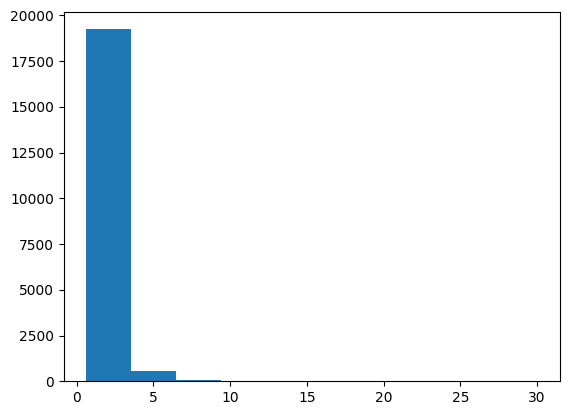

In [33]:
import matplotlib.pyplot as plt

plt.hist(resolution_pdb)

#### ¿Cómo crear nuevas columnas derivadas de columnas existentes?

No hay necesidad de recorrer todas las filas de su tabla de datos para hacer cálculos. Las manipulaciones de datos en una columna funcionan por elementos. Agregar una columna a un DataFrame en función de los datos existentes en otras columnas es sencillo.

📝 **Consigna 4:** Deseo hacer una operación sobre una columna existente y poner ese resultado en una nueva columna ¿cómo harías?

In [34]:
def multiplica(columna,factor):
    return columna*factor

resultado_ant = multiplica(datos_pdb['Resolution'],4)

datos_pdb['doble_resolucion'] = resultado_ant
# datos_pdb.to_csv('/path_to_my_file/tabla.csv',sep='\t',decimal=',',index=False)

In [38]:
datos_pdb.iloc[:,2:6]

,Structure Title,Resolution,Ligand ID,Ligand Name
0,CRYSTALLOGRAPHIC ANALYSIS OF C-C-A-A-G-C-T-T-G...,1.9,CA,CALCIUM ION
1,CRYSTALLOGRAPHIC ANALYSIS OF C-C-A-A-G-C-T-T-G...,1.9,CA,CALCIUM ION
2,CRYSTAL STRUCTURE OF C-T-C-T-C-G-A-G-A-G: IMPL...,1.7,CA,CALCIUM ION
3,CRYSTAL STRUCTURE OF C-T-C-T-C-G-A-G-A-G: IMPL...,1.7,CA,CALCIUM ION
4,CRYSTAL STRUCTURE OF A NON-PSYCHROPHILIC TRYPS...,1.7,CA,CALCIUM ION
...,...,...,...,...
55488,NaN,NaN,NaN,NaN
55489,NaN,NaN,NaN,NaN
55490,NaN,NaN,NaN,NaN
55491,NaN,NaN,NaN,NaN


#### ¿Cómo calcular las estadísticas de resumen?

Las estadísticas básicas (media, mediana, mín., máx., recuentos...) son fácilmente calculables. Estas agregaciones o las personalizadas se pueden aplicar en todo el conjunto de datos, en una ventana deslizante de los datos o agrupados por categorías. Este último también se conoce como el enfoque de división, aplicación y combinación.

📝 **Consigna 5:** ¿Cómo podríamos resumir la información de la tabla? ¿Es posible hacer una descripción de los datos numéricos y categóricos?

In [37]:
datos_pdb.describe()

,Resolution,doble_resolucion
count,19930.000000,19930.000000
mean,2.257431,9.029724
std,1.134987,4.539949
min,0.610000,2.440000
25%,1.800000,7.200000
50%,2.100000,8.400000
75%,2.500000,10.000000
max,30.000000,120.000000


#### ¿Cómo remodelar el diseño de las tablas?

Cambie la estructura de su tabla de datos de múltiples maneras. Puede derretir () su tabla de datos de forma ancha a larga/ordenada o girar () de formato largo a ancho. Con las agregaciones integradas, se crea una tabla dinámica con un solo comando.

[Doc-reshaping](http://pandas.pydata.org/docs/user_guide/reshaping.html)

📝 **Consigna 6:** Si tenés varias categorias en distintas columnas, ¿cómo harías un stacking de los datos?

#### ¿Cómo combinar datos de varias tablas?

Se pueden concatenar varias tablas tanto en columnas como en filas, ya que se proporcionan operaciones de unión/fusión similares a las de una base de datos para combinar varias tablas de datos.

[Doc](http://pandas.pydata.org/docs/user_guide/merging.html)

📝 **Consigna 7:** ¿Cómo harían si tuvieran agregar una segunda tabla que comparte las mismas columnas? ¿Y si comparten algunas filas?

#### ¿Cómo manejar datos de series temporales?

pandas tiene un gran soporte para series temporales y tiene un amplio conjunto de herramientas para trabajar con fechas, horas y datos indexados por tiempo.

[Doc](http://pandas.pydata.org/docs/user_guide/timeseries.html)

📝 **Consigna 8:** Agregar una columna con la diferencia de días entre dos fechas

#### ¿Cómo manipular datos textuales?

Los conjuntos de datos no solo contienen datos numéricos. pandas proporciona una amplia gama de funciones para limpiar datos textuales y extraer información útil de ellos.

[Doc-Text](http://pandas.pydata.org/docs/user_guide/text.html)

[Doc-Categorical data](http://pandas.pydata.org/docs/user_guide/categorical.html)

📝 **Consigna 9:** ¿Cómo podés describir y organizar datos que son categóricos o no numéricos?